In [1]:
import pandas as pd
from tabulate import tabulate
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path = './resume/applications.csv'

In [3]:
def csv_to_df(csv_path):
    #https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
    df = pd.read_csv(csv_path, sep = ',', encoding = 'ISO-8859-1')
    
    #drop duplicates & nan
    df = df.drop_duplicates()
    #Drop the rows where all elements are missing.
    df = df.dropna(subset = ['date', 'company', 'position'])
    
    #fill nan
    values = {'location': 'N/A', 'competiter': 0, 'refer': 0, 'respond_date': '', 'interview': 0, 'rejection': 0}
    df = df.fillna(value = values)
    
    #convert str to datetime
    df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)
    #errors='coerce': NaT for null
    df['respond_date'] =  pd.to_datetime(df['respond_date'], infer_datetime_format=True, errors='coerce')
    
    for index, row in df.iterrows():
        #get rid of ', US'
        if(row['location'].endswith(", US")):
            row['location'] = row['location'][:-4]

        #get rid of ', United States'
        if(row['location'].endswith(", United States")):
            row['location'] = row['location'][:-15]

        #'Massachusetts' to 'MA'
        if("Massachusetts" in row['location']):
            row['location'] = row['location'].replace("Massachusetts", "MA")
        
        #'Ma' to 'MA'
        if(row['location'][-1].islower()):
            row['location'] = row['location'].replace("Ma", "MA")
        
        #set df value
        df.set_value(index, 'location', row['location'])
    
    return df

In [4]:
df = csv_to_df(csv_path)
df

/Users/jiahaozhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,date,company,position,location,competiter,refer,respond_date,interview,rejection
0,2019-12-06,Allstate,New Grad - Big Data Engineer,"Dallas, TX",0.0,0.0,2019-12-16,0.0,1.0
1,2019-12-12,Roblox,Software Engineer - New Grad,"San Mateo, CA",4093.0,0.0,2019-12-17,0.0,1.0
2,2019-12-13,Spotify,Data Engineer - Personalization,N/A,0.0,0.0,NaT,0.0,0.0
3,2019-12-14,Coinbase,University Grad - Software Engineer,"New York City, NY",0.0,0.0,NaT,0.0,0.0
4,2019-12-14,Intel,software engineer,"Santa Clara, CA",0.0,0.0,2019-12-16,0.0,1.0
...,...,...,...,...,...,...,...,...,...
325,2020-03-05,GE,Data Systems Software Engineer,"Lynn, MA",0.0,0.0,NaT,0.0,0.0
326,2020-03-05,Soofa,Operations Engineer,"Cambridge, MA",0.0,0.0,NaT,0.0,0.0
327,2020-03-06,Astyra Corporation,Software Developer VR,"Boston, MA",0.0,0.0,NaT,0.0,0.0
328,2020-03-06,Zenith,Data Engineer (Python ETL),"New York, NY",66.0,0.0,NaT,0.0,0.0


# pandas

<font size = '5' color = 'red'>Summary of Feb</font>

In [5]:
df_feb_application = df.loc[(df['date'] >= '2020-02-01') & (df['date'] <= '2020-02-29')]
num_feb_application = len(df_feb_application)
print(num_feb_application)
df_feb_application

111


,date,company,position,location,competiter,refer,respond_date,interview,rejection
157,2020-02-03,Taos,Data Engineer/Developer - Boston,"Boston, MA",146.0,0.0,2020-02-09,0.0,0.0
158,2020-02-03,NantHealth,Software Engineer,"Boston, MA",117.0,0.0,NaT,0.0,0.0
159,2020-02-03,DataKitchen,Data Engineer,"Boston, MA",0.0,0.0,NaT,0.0,0.0
160,2020-02-03,DataKitchen,DataOps Implementation Engineer,"Boston, MA",27.0,0.0,2020-02-19,1.0,0.0
161,2020-02-03,ROSEN,Junior Data Engineer,"Columbus, OH",25.0,0.0,NaT,0.0,0.0
...,...,...,...,...,...,...,...,...,...
263,2020-02-21,SaasWorks,Data Engineer,"Boston, MA",51.0,0.0,NaT,0.0,0.0
264,2020-02-21,"DIVERSANT, LLC",Python Software Engineer,"Broomfield, CO",70.0,0.0,NaT,0.0,0.0
265,2020-02-21,Collabera Inc.,Data Engineer,"Vienna, VA",42.0,0.0,NaT,0.0,0.0
266,2020-02-21,Panasonic USA,Software Engineer (PENA),"Sparks, NV",29.0,0.0,2020-02-28,0.0,1.0


In [6]:
df_feb_interview = df.loc[(df['respond_date'] >= '2020-02-01') & (df['respond_date'] <= '2020-02-29') & (df['interview'] == 1)]
num_feb_interview = len(df_feb_interview)
print(num_feb_interview)
df_feb_interview

5


,date,company,position,location,competiter,refer,respond_date,interview,rejection
138,2020-01-29,BHE,Data Integration Engineer,"Boston, MA",53.0,0.0,2020-02-05,1.0,0.0
160,2020-02-03,DataKitchen,DataOps Implementation Engineer,"Boston, MA",27.0,0.0,2020-02-19,1.0,0.0
182,2020-02-04,LeafLink,Analytics Engineer,"SoHo, NY",29.0,0.0,2020-02-06,1.0,1.0
189,2020-02-06,Linguamatics,Text Mining Data Engineer,"Marlborough, MA",0.0,0.0,2020-02-27,1.0,0.0
267,2020-02-27,Antra,Java Backend Software Engineer,"Loudoun County, VA",0.0,0.0,2020-02-27,1.0,0.0


<font size = '5' color = 'red'>How many applications</font>

In [7]:
num_applications = len(df)
num_applications

329

In [8]:
df.date.describe()

count                     329
unique                     51
top       2020-02-17 00:00:00
freq                       21
first     2019-12-06 00:00:00
last      2020-03-06 00:00:00
Name: date, dtype: object

In [9]:
first_date = df.date.min()
last_date = df.date.max()
unique_date = df.date.nunique()
total_date = last_date - first_date
print("first date: ", first_date)
print("last date: ", last_date)
print("How many days applied: ", unique_date)
print("total days: ", total_date)

first date:  2019-12-06 00:00:00
last date:  2020-03-06 00:00:00
How many days applied:  51
total days:  91 days 00:00:00


In [10]:
#change pd.datetime to str
df.date.dt.strftime('%m/%d/%Y')

0      12/06/2019
1      12/12/2019
2      12/13/2019
3      12/14/2019
4      12/14/2019
          ...    
325    03/05/2020
326    03/05/2020
327    03/06/2020
328    03/06/2020
329    03/06/2020
Name: date, Length: 329, dtype: object

<font size = '4' color = 'blue'>application vs date</font>

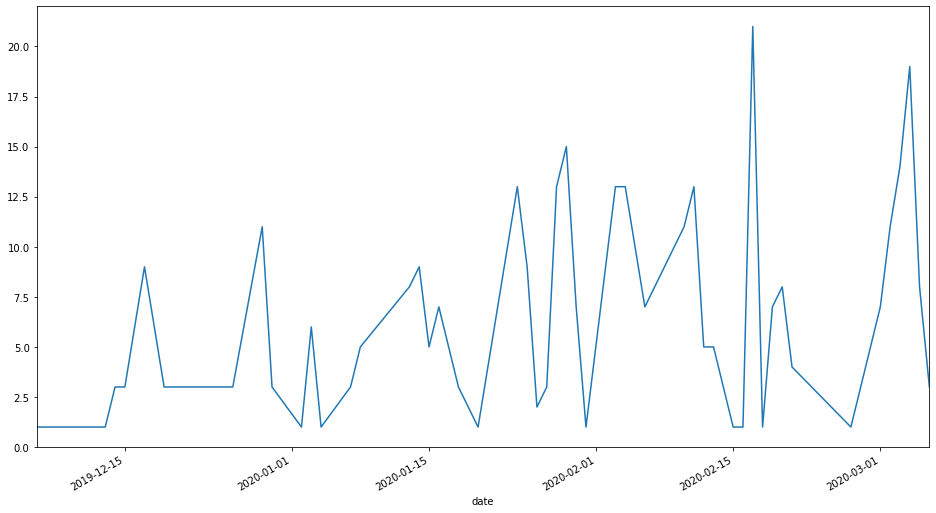

In [11]:
df.date.groupby(df["date"]).count().plot(figsize = (16, 9))

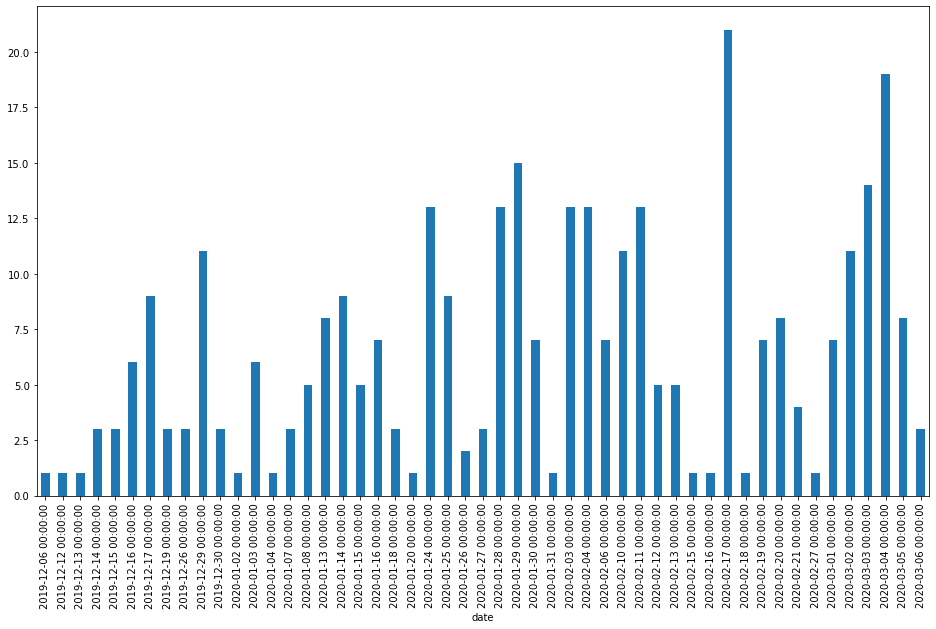

In [12]:
df.date.groupby(df["date"]).count().plot(kind = 'bar', figsize = (16, 9))

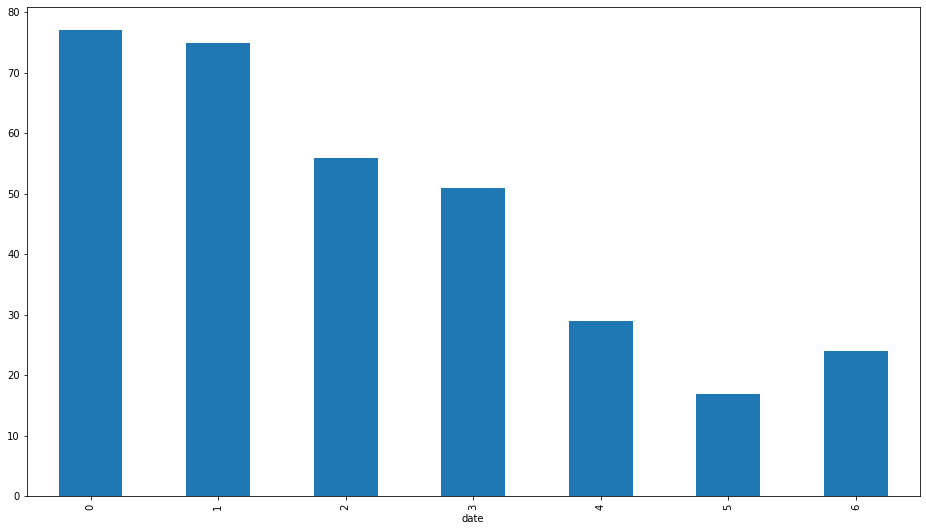

In [13]:
df.date.groupby(df["date"].dt.weekday).count().plot(kind = 'bar', figsize = (16, 9))

<font size="5" color = 'red'>How many responds</font>  

In [14]:
#df not None
df_get_respond = df.loc[df['respond_date'].notna()]
df_get_respond

,date,company,position,location,competiter,refer,respond_date,interview,rejection
0,2019-12-06,Allstate,New Grad - Big Data Engineer,"Dallas, TX",0.0,0.0,2019-12-16,0.0,1.0
1,2019-12-12,Roblox,Software Engineer - New Grad,"San Mateo, CA",4093.0,0.0,2019-12-17,0.0,1.0
4,2019-12-14,Intel,software engineer,"Santa Clara, CA",0.0,0.0,2019-12-16,0.0,1.0
5,2019-12-14,Siemens,R&D Software Engineer,N/A,0.0,0.0,2019-12-18,0.0,1.0
10,2019-12-16,HubSpot,Software Engineer,"Cambridge, MA",0.0,0.0,2019-12-18,0.0,1.0
...,...,...,...,...,...,...,...,...,...
289,2020-03-03,Mercari,Data Engineer,"Boston, MA",0.0,0.0,2020-03-05,0.0,1.0
304,2020-03-04,Manulife,Data Scientist,"Boston, MA",0.0,0.0,2020-03-05,0.0,1.0
311,2020-03-04,Moody's Analytics,Big Data Engineer,"Waltham, MA",66.0,0.0,2020-03-05,0.0,1.0
314,2020-03-04,Linksquares,Dev Ops Engineer,"Boston, MA",9.0,0.0,2020-03-05,0.0,1.0


In [15]:
num_respond = len(df_get_respond)
num_respond

75

<font size = '3' color = 'blue'>Application vs respond</font>

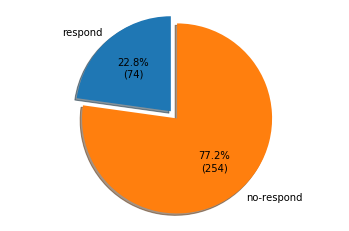

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'respond', 'no-respond'
sizes = [num_respond, num_applications - num_respond]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'respond')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<font size = '5' color = 'red'> How many interview </font>

In [17]:
df_get_interview = df.loc[df['interview'] == 1]
num_interview = len(df_get_interview)
print(num_interview)
df_get_interview

15


,date,company,position,location,competiter,refer,respond_date,interview,rejection
22,2019-12-17,Amplitude,"ÊNew Grad - Software Engineer, Full Stack","San Francisco, CA",525.0,0.0,NaT,1.0,0.0
27,2019-12-26,Fidelity,Data Engineer,"Durham, NC",20.0,0.0,2020-01-06,1.0,0.0
57,2020-01-08,CogoÊLabs,Software Engineer - New Grad,"Cambridge, MA",151.0,0.0,2020-01-13,1.0,1.0
75,2020-01-14,Understanding Recruitment (agent),"Software Engineer (Parallel Programming, CPU, ...","Waltham, MA",21.0,0.0,2020-01-16,1.0,0.0
92,2020-01-20,Harvard Medical School and Boston Children's H...,Database engineer,"Boston, MA",0.0,0.0,2020-01-22,1.0,0.0
93,2020-01-24,LexaGene,Robotic Instrumentation Software Engineer,"Beverly, MA",0.0,0.0,2020-01-29,1.0,1.0
102,2020-01-24,Imprivata,Software Engineer I,"Lexington, MA",0.0,0.0,2020-01-28,1.0,0.0
110,2020-01-25,RAYTHEON,Systems Engineer I,"Marlborough, MA",0.0,0.0,2020-01-31,1.0,1.0
115,2020-01-26,Insight Global (agent),Software Engineer,"Boston, MA",0.0,0.0,2020-01-27,1.0,0.0
127,2020-01-28,EGEN icc,Data Engineer,"Chicago, IL",0.0,0.0,2020-01-28,1.0,0.0


<font size = '4' color = 'blue'>Interview vs rejections vs applications</font>

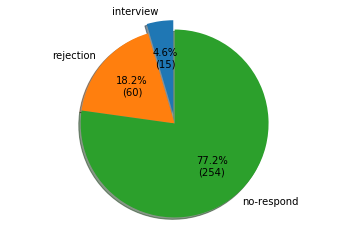

In [18]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'interview', 'rejection', 'no-respond'
sizes = [num_interview, num_respond - num_interview, num_applications - num_respond]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'interview')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<font size = '5' color = 'red'>How many different locations of application</font>

In [19]:
df.location.value_counts()

Boston, MA            85
Cambridge, MA         27
San Francisco, CA     19
Waltham, MA           14
N/A                   12
                      ..
Broomfield, CO         1
Cincinnati, OH         1
Englewood, CO          1
New York, NY           1
Loudoun County, VA     1
Name: location, Length: 104, dtype: int64

In [20]:
df_ma = df.loc[df['location'].str.contains("MA")]
num_ma = len(df_ma)
df_ma

,date,company,position,location,competiter,refer,respond_date,interview,rejection
6,2019-12-15,iRobot,Data Engineer,"Bedford, MA",0.0,0.0,NaT,0.0,0.0
8,2019-12-15,Parsed,Data Engineer,"Waltham, MA",0.0,0.0,NaT,0.0,0.0
10,2019-12-16,HubSpot,Software Engineer,"Cambridge, MA",0.0,0.0,2019-12-18,0.0,1.0
31,2019-12-29,Datadog,Software Engineer - Recent Grad,"Boston, MA",126.0,0.0,NaT,0.0,0.0
32,2019-12-29,Tank Utility,Software Engineer,"Boston, MA",20.0,0.0,NaT,0.0,0.0
...,...,...,...,...,...,...,...,...,...
317,2020-03-04,NeuralFrame,Software Engineer,"Somerville, MA",0.0,0.0,NaT,0.0,0.0
318,2020-03-04,Amazon,Data Engineer,"Boston, MA",0.0,0.0,2020-03-05,0.0,1.0
325,2020-03-05,GE,Data Systems Software Engineer,"Lynn, MA",0.0,0.0,NaT,0.0,0.0
326,2020-03-05,Soofa,Operations Engineer,"Cambridge, MA",0.0,0.0,NaT,0.0,0.0


In [21]:
df_ca = df.loc[df['location'].str.contains("CA")]
num_ca = len(df_ca)
df_ca

,date,company,position,location,competiter,refer,respond_date,interview,rejection
1,2019-12-12,Roblox,Software Engineer - New Grad,"San Mateo, CA",4093.0,0.0,2019-12-17,0.0,1.0
4,2019-12-14,Intel,software engineer,"Santa Clara, CA",0.0,0.0,2019-12-16,0.0,1.0
7,2019-12-15,VMWare,site reliability engineering developer,"Palo Alto, CA",0.0,0.0,NaT,0.0,0.0
12,2019-12-16,Youtube,New Graduate - Software Development Engineer,"Mountain View, CA",0.0,0.0,NaT,0.0,0.0
20,2019-12-17,Mapbox,Software Engineer - New Grad 2020,"San Francisco, CA",112.0,0.0,2020-02-25,0.0,1.0
21,2019-12-17,Blend,Software Engineer - New Grad,"San Francisco, CA",174.0,0.0,NaT,0.0,0.0
22,2019-12-17,Amplitude,"ÊNew Grad - Software Engineer, Full Stack","San Francisco, CA",525.0,0.0,NaT,1.0,0.0
23,2019-12-17,Western Digital,"Engineer, Data Analytics","San Jose, CA",25.0,0.0,NaT,0.0,0.0
24,2019-12-19,Ripple,"Software Engineer, New Grad","San Francisco, CA",400.0,0.0,NaT,0.0,0.0
25,2019-12-19,Automation Anywhere,Software Engineer (New College Grad),"San Jose, CA",834.0,0.0,NaT,0.0,0.0


In [22]:
df_ny = df.loc[df['location'].str.contains("NY")]
num_ny = len(df_ny)
df_ny

,date,company,position,location,competiter,refer,respond_date,interview,rejection
3,2019-12-14,Coinbase,University Grad - Software Engineer,"New York City, NY",0.0,0.0,NaT,0.0,0.0
13,2019-12-16,Expedia,New Graduate - Software Development Engineer 1,"New York, NY",0.0,0.0,NaT,0.0,0.0
17,2019-12-17,LiveRamp,"Generalist Software Engineer, New Grad","New York City, NY",1696.0,0.0,2019-12-29,0.0,1.0
18,2019-12-17,Snap Inc.,"New Grad, Software Engineer, Perception","New York City, NY",156.0,0.0,2019-12-18,0.0,1.0
19,2019-12-17,Twine,Software Engineer Ð New Grad,"New York City, NY",0.0,0.0,NaT,0.0,0.0
45,2020-01-03,Facebook,"Software Engineer, University Grad","New York, NY",898.0,0.0,NaT,0.0,0.0
66,2020-01-13,Next Jump,"Software Engineer, New Grad","New York City, NY",606.0,0.0,2020-01-24,0.0,1.0
154,2020-01-30,Averity,Data Engineer,"New York, NY",97.0,0.0,NaT,0.0,0.0
177,2020-02-04,Tapad,Data Engineer,"New York City, NY",0.0,0.0,NaT,0.0,0.0
178,2020-02-04,H1.,Data Engineer,"New York, NY",0.0,0.0,NaT,0.0,0.0


In [23]:
df_tx = df.loc[df['location'].str.contains("TX")]
num_tx = len(df_tx)
df_tx

,date,company,position,location,competiter,refer,respond_date,interview,rejection
0,2019-12-06,Allstate,New Grad - Big Data Engineer,"Dallas, TX",0.0,0.0,2019-12-16,0.0,1.0
135,2020-01-29,Pearson,Software Engineer - New Grad,"Austin, TX",137.0,0.0,NaT,0.0,0.0
141,2020-01-29,L3Harris,Software Engineer (New Grad),"Greenville, TX",86.0,0.0,NaT,0.0,0.0
144,2020-01-29,HCSC,University New Grad - Associate Developer,"Richardson, TX",105.0,0.0,NaT,0.0,0.0
176,2020-02-04,PetroplanÊ,Data Engineer,"Hoston, TX",12.0,0.0,NaT,0.0,0.0
183,2020-02-06,Infosys,Java Developer,"Austin, TX",80.0,0.0,NaT,0.0,0.0
202,2020-02-11,Dun & bradstreet,Software Engineer,"Austin, TX",1.0,0.0,NaT,0.0,0.0
203,2020-02-11,Under Armour,"Software, Engineer, Backend","Austin, TX",93.0,0.0,2020-02-25,0.0,1.0
225,2020-02-16,Quest Groups LLC,Data Engineer,"Austin, TX",44.0,0.0,NaT,0.0,0.0
251,2020-02-19,Zynga,New Grad Full-Time Rotational Software Engineer,"Austin, TX",1541.0,0.0,NaT,0.0,0.0


In [24]:
df_wa = df.loc[df['location'].str.contains("WA")]
num_wa = len(df_wa)
df_wa

,date,company,position,location,competiter,refer,respond_date,interview,rejection
14,2019-12-16,Nordstrom,Software Engineer - Data Platform and Edge Com...,"Seattle, WA",0.0,0.0,NaT,0.0,0.0
30,2019-12-29,Expedia,Data Engineer I,"Bellevue, WA",165.0,0.0,2020-01-10,0.0,1.0
81,2020-01-15,Microsoft,Software Engineer,"Seattle, WA",0.0,0.0,NaT,0.0,0.0
86,2020-01-16,Homesite Insurance,Data Engineer,"seattle, WA",48.0,0.0,NaT,0.0,0.0
147,2020-01-29,Amazon,ÊBusiness Intelligence Engineer- Alexa Data Se...,"Seattle, WA",5.0,0.0,NaT,0.0,0.0
148,2020-01-29,Amazon,Data Engineer,"Seattle, WA",4.0,0.0,NaT,0.0,0.0
213,2020-02-11,Tata,Software Engineer,"Seattle, WA",161.0,0.0,NaT,0.0,0.0
218,2020-02-12,Amazon,BIE,"Seattle, WA",0.0,0.0,NaT,0.0,0.0
322,2020-03-05,SirionLabs,Software Engineer,"Seattle, WA",286.0,0.0,NaT,0.0,0.0


<font size = '4' color = 'blue'>Location vs Application</font>

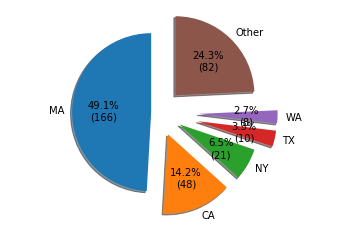

In [25]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'MA', 'CA', 'NY', 'TX', 'WA', 'Other'
sizes = [num_ma, 
         num_ca, 
         num_ny, 
         num_tx, 
         num_wa, 
         num_applications-num_ma-num_ca-num_ny-num_tx]
explode = (0.1, 0.3, 0.3, 0.5, 0.5, 0.3) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<font size='5' color = 'red'>Location vs Interview</font>

In [26]:
df_get_interview.location.value_counts()

Boston, MA            4
Marlborough, MA       2
Chicago, IL           1
Cambridge, MA         1
Beverly, MA           1
San Francisco, CA     1
Loudoun County, VA    1
Durham, NC            1
Lexington, MA         1
Waltham, MA           1
SoHo, NY              1
Name: location, dtype: int64

In [27]:
df_get_interview_ma = df_get_interview.loc[df_get_interview['location'].str.contains("MA")]
num_interview_ma = len(df_get_interview_ma)
print(num_interview_ma)
df_get_interview_ma

10


,date,company,position,location,competiter,refer,respond_date,interview,rejection
57,2020-01-08,CogoÊLabs,Software Engineer - New Grad,"Cambridge, MA",151.0,0.0,2020-01-13,1.0,1.0
75,2020-01-14,Understanding Recruitment (agent),"Software Engineer (Parallel Programming, CPU, ...","Waltham, MA",21.0,0.0,2020-01-16,1.0,0.0
92,2020-01-20,Harvard Medical School and Boston Children's H...,Database engineer,"Boston, MA",0.0,0.0,2020-01-22,1.0,0.0
93,2020-01-24,LexaGene,Robotic Instrumentation Software Engineer,"Beverly, MA",0.0,0.0,2020-01-29,1.0,1.0
102,2020-01-24,Imprivata,Software Engineer I,"Lexington, MA",0.0,0.0,2020-01-28,1.0,0.0
110,2020-01-25,RAYTHEON,Systems Engineer I,"Marlborough, MA",0.0,0.0,2020-01-31,1.0,1.0
115,2020-01-26,Insight Global (agent),Software Engineer,"Boston, MA",0.0,0.0,2020-01-27,1.0,0.0
138,2020-01-29,BHE,Data Integration Engineer,"Boston, MA",53.0,0.0,2020-02-05,1.0,0.0
160,2020-02-03,DataKitchen,DataOps Implementation Engineer,"Boston, MA",27.0,0.0,2020-02-19,1.0,0.0
189,2020-02-06,Linguamatics,Text Mining Data Engineer,"Marlborough, MA",0.0,0.0,2020-02-27,1.0,0.0


<font size = '4' color = 'blue'>Location vs Interview</font>

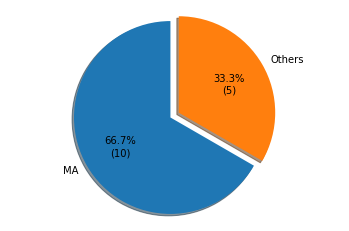

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'MA', 'Others'
sizes = [num_interview_ma, num_interview - num_interview_ma]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'respond')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<font size = '5' color = 'red'>Software vs Data</font>

In [32]:
df_software = df.loc[df['position'].str.contains("Software|developer|java", case = False)]
num_software = len(df_software)
print(num_software)
df_software

196


,date,company,position,location,competiter,refer,respond_date,interview,rejection
1,2019-12-12,Roblox,Software Engineer - New Grad,"San Mateo, CA",4093.0,0.0,2019-12-17,0.0,1.0
3,2019-12-14,Coinbase,University Grad - Software Engineer,"New York City, NY",0.0,0.0,NaT,0.0,0.0
4,2019-12-14,Intel,software engineer,"Santa Clara, CA",0.0,0.0,2019-12-16,0.0,1.0
5,2019-12-14,Siemens,R&D Software Engineer,N/A,0.0,0.0,2019-12-18,0.0,1.0
7,2019-12-15,VMWare,site reliability engineering developer,"Palo Alto, CA",0.0,0.0,NaT,0.0,0.0
...,...,...,...,...,...,...,...,...,...
322,2020-03-05,SirionLabs,Software Engineer,"Seattle, WA",286.0,0.0,NaT,0.0,0.0
323,2020-03-05,Volt Workforce Solutions,Entry Level Software Engineer,"St. Louis, MO",405.0,0.0,NaT,0.0,0.0
324,2020-03-05,Revinate,"Software Engineer, Data Pipeline","San Francisco, CA",162.0,0.0,NaT,0.0,0.0
325,2020-03-05,GE,Data Systems Software Engineer,"Lynn, MA",0.0,0.0,NaT,0.0,0.0


In [30]:
df_data = df.loc[df['position'].str.contains("data|analy*", case = False)]
num_data = len(df_data)
print(num_data)
df_data

135


,date,company,position,location,competiter,refer,respond_date,interview,rejection
0,2019-12-06,Allstate,New Grad - Big Data Engineer,"Dallas, TX",0.0,0.0,2019-12-16,0.0,1.0
2,2019-12-13,Spotify,Data Engineer - Personalization,N/A,0.0,0.0,NaT,0.0,0.0
6,2019-12-15,iRobot,Data Engineer,"Bedford, MA",0.0,0.0,NaT,0.0,0.0
8,2019-12-15,Parsed,Data Engineer,"Waltham, MA",0.0,0.0,NaT,0.0,0.0
9,2019-12-16,Conversant,Big Data Solutions Associate (New Grad),"Ashburn, VA",0.0,0.0,NaT,0.0,0.0
...,...,...,...,...,...,...,...,...,...
321,2020-03-05,The Coca-Cola Company,Data Analytics Engineer,"Atlanta, GA",106.0,0.0,NaT,0.0,0.0
324,2020-03-05,Revinate,"Software Engineer, Data Pipeline","San Francisco, CA",162.0,0.0,NaT,0.0,0.0
325,2020-03-05,GE,Data Systems Software Engineer,"Lynn, MA",0.0,0.0,NaT,0.0,0.0
328,2020-03-06,Zenith,Data Engineer (Python ETL),"New York, NY",66.0,0.0,NaT,0.0,0.0


<font size = '4' color = 'blue'>Total Software vs Data vs Other</font>

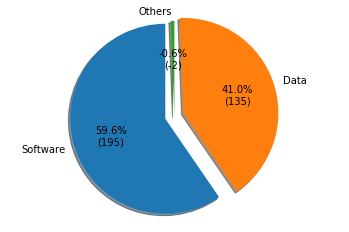

In [33]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Software', 'Data', 'Others'
sizes = [num_software, num_data, num_applications - num_software - num_data]
explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'respond')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<font size = '5' color = 'red'>How many software, data get interview</font>

In [34]:
df_software_interview = df_get_interview.loc[df_get_interview['position'].str.contains("software|developer", case = False)]
num_software_interview = len(df_software_interview)
print(num_software_interview)
df_software_interview

7


,date,company,position,location,competiter,refer,respond_date,interview,rejection
22,2019-12-17,Amplitude,"ÊNew Grad - Software Engineer, Full Stack","San Francisco, CA",525.0,0.0,NaT,1.0,0.0
57,2020-01-08,CogoÊLabs,Software Engineer - New Grad,"Cambridge, MA",151.0,0.0,2020-01-13,1.0,1.0
75,2020-01-14,Understanding Recruitment (agent),"Software Engineer (Parallel Programming, CPU, ...","Waltham, MA",21.0,0.0,2020-01-16,1.0,0.0
93,2020-01-24,LexaGene,Robotic Instrumentation Software Engineer,"Beverly, MA",0.0,0.0,2020-01-29,1.0,1.0
102,2020-01-24,Imprivata,Software Engineer I,"Lexington, MA",0.0,0.0,2020-01-28,1.0,0.0
115,2020-01-26,Insight Global (agent),Software Engineer,"Boston, MA",0.0,0.0,2020-01-27,1.0,0.0
267,2020-02-27,Antra,Java Backend Software Engineer,"Loudoun County, VA",0.0,0.0,2020-02-27,1.0,0.0


In [35]:
df_data_interview = df_get_interview.loc[df_get_interview['position'].str.contains("analy*|data", case = False)]
num_data_interview = len(df_data_interview)
print(num_data_interview)
df_data_interview

7


,date,company,position,location,competiter,refer,respond_date,interview,rejection
27,2019-12-26,Fidelity,Data Engineer,"Durham, NC",20.0,0.0,2020-01-06,1.0,0.0
92,2020-01-20,Harvard Medical School and Boston Children's H...,Database engineer,"Boston, MA",0.0,0.0,2020-01-22,1.0,0.0
127,2020-01-28,EGEN icc,Data Engineer,"Chicago, IL",0.0,0.0,2020-01-28,1.0,0.0
138,2020-01-29,BHE,Data Integration Engineer,"Boston, MA",53.0,0.0,2020-02-05,1.0,0.0
160,2020-02-03,DataKitchen,DataOps Implementation Engineer,"Boston, MA",27.0,0.0,2020-02-19,1.0,0.0
182,2020-02-04,LeafLink,Analytics Engineer,"SoHo, NY",29.0,0.0,2020-02-06,1.0,1.0
189,2020-02-06,Linguamatics,Text Mining Data Engineer,"Marlborough, MA",0.0,0.0,2020-02-27,1.0,0.0


<font size = '4' color = 'blue'>software_interview vs data_interview</font>

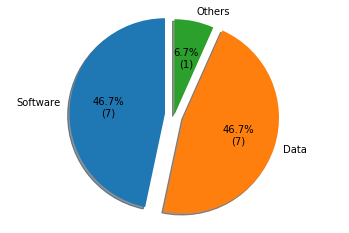

In [36]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Software', 'Data', 'Others'
sizes = [num_software_interview, num_data_interview, num_interview - num_software_interview - num_data_interview]
explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'respond')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [37]:
print("Data get interview: " + "{:.1%}".format(num_data_interview / num_data))

Data get interview: 5.2%


In [38]:
print("Software get interview: " +"{:.1%}".format(num_software_interview / num_software))

Software get interview: 3.6%


<font size = '5' color = 'red'>New Grad vs Entry Level</font>

In [39]:
df_new_grad = df.loc[df['position'].str.contains("new|grad|grads|university|college", case = False)]
num_new_grad = len(df_new_grad)
print(num_new_grad)
df_new_grad

60


,date,company,position,location,competiter,refer,respond_date,interview,rejection
0,2019-12-06,Allstate,New Grad - Big Data Engineer,"Dallas, TX",0.0,0.0,2019-12-16,0.0,1.0
1,2019-12-12,Roblox,Software Engineer - New Grad,"San Mateo, CA",4093.0,0.0,2019-12-17,0.0,1.0
3,2019-12-14,Coinbase,University Grad - Software Engineer,"New York City, NY",0.0,0.0,NaT,0.0,0.0
9,2019-12-16,Conversant,Big Data Solutions Associate (New Grad),"Ashburn, VA",0.0,0.0,NaT,0.0,0.0
12,2019-12-16,Youtube,New Graduate - Software Development Engineer,"Mountain View, CA",0.0,0.0,NaT,0.0,0.0
13,2019-12-16,Expedia,New Graduate - Software Development Engineer 1,"New York, NY",0.0,0.0,NaT,0.0,0.0
15,2019-12-17,WillowTree,Software Engineer Ð New Grad,"Charlottesville, VA",217.0,0.0,2019-12-19,0.0,1.0
17,2019-12-17,LiveRamp,"Generalist Software Engineer, New Grad","New York City, NY",1696.0,0.0,2019-12-29,0.0,1.0
18,2019-12-17,Snap Inc.,"New Grad, Software Engineer, Perception","New York City, NY",156.0,0.0,2019-12-18,0.0,1.0
19,2019-12-17,Twine,Software Engineer Ð New Grad,"New York City, NY",0.0,0.0,NaT,0.0,0.0


<font size = '4' color = 'blue'>New Grad vs Not New Grad</font>

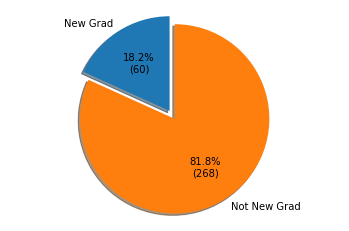

In [40]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'New Grad', 'Not New Grad'
sizes = [num_new_grad, num_applications - num_new_grad]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'respond')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<font size = '5' color = 'red'>New Grad Interview</font>

In [41]:
df_new_grad_interview = df_get_interview.loc[df_get_interview['position'].str.contains("new|grad|grads|university|college")]
num_new_grad_interview = len(df_new_grad_interview)
print(num_new_grad_interview)
df_new_grad_interview

0


,date,company,position,location,competiter,refer,respond_date,interview,rejection


<font size = '5' color = 'red'>Respond_date vs Date</font>

<font size = '4' color = 'blue'>Respond_date vs Weekdays</font>

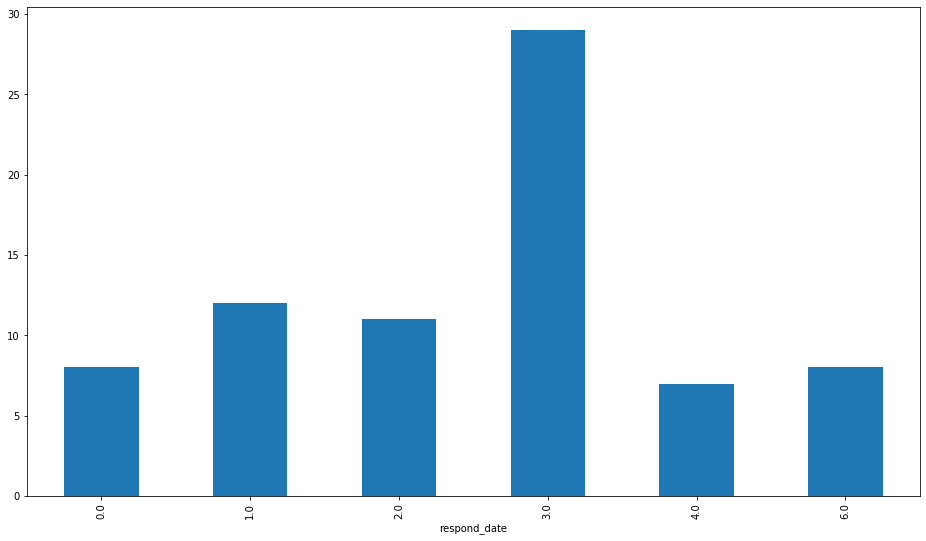

In [42]:
df.date.groupby(df['respond_date'].dt.weekday).count().plot(kind = 'bar', figsize = (16, 9))

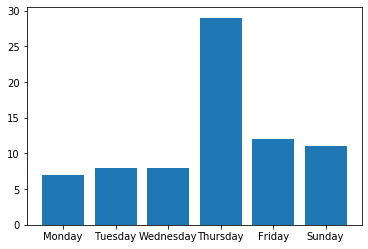

In [43]:
respond_list = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for index, row in df.iterrows():
    if pd.notna(row['respond_date']):
        #timestamp.weekday()
        respond_list.append(weekdays[row['respond_date'].weekday()])

#bar plot base on count of a list
keys, counts = np.unique(respond_list, return_counts=True)
#sort keys base on weekdays.index
keys = sorted(keys, key = weekdays.index)
plt.bar(keys, counts)
plt.show()

<font size = '4' color = 'blue'>Interview_date vs Weekdays</font>

In [44]:
# df_grouped = df.groupby(df['respond_date'].dt.weekday)
# print(df_grouped)
# df_grouped.apply(lambda x: x['interview'] == 1).count().plot(kind = 'bar', figsize = (16, 9))

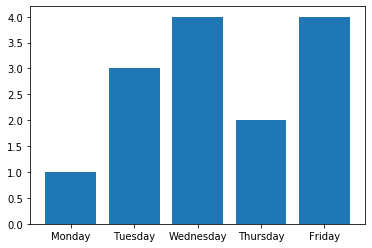

In [45]:
interview_list = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for index, row in df.iterrows():
    if pd.notna(row['respond_date']) and row['interview'] == 1:
        #timestamp.weekday()
        interview_list.append(weekdays[row['respond_date'].weekday()])

#bar plot base on count of a list
keys, counts = np.unique(interview_list, return_counts=True)
#sort keys base on weekdays.index
keys = sorted(keys, key = weekdays.index)
plt.bar(keys, counts)
plt.show()

In [46]:
total_diff = 0
for index, row in df.iterrows():
    if pd.notna(row['respond_date']):
        diff = row['respond_date'] - row['date']
        total_diff += diff.days
avg_respond_day = round(total_diff/num_respond, 1)
print("average respond time is: " + str(avg_respond_day) + " days")

average respond time is: 8.4 days


In [47]:
total_diff = 0
for index, row in df.iterrows():
    if pd.notna(row['respond_date']) and row['interview'] == 1:
        diff = row['respond_date'] - row['date']
        total_diff += diff.days
avg_respond_day = round(total_diff/num_interview, 1)
print("average respond time for interview is: " + str(avg_respond_day) + " days")

average respond time for interview is: 5.5 days


<font size = '5' color = 'red'>Load into MySQL</font>

In [10]:
#https://stackoverflow.com/questions/2995054/access-denied-for-user-rootlocalhost-using-passwordno
mycon = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = ''
)
print(mycon)

In [11]:
mycursor = mycon.cursor()
    
# mycursor.execute("CREATE DATABASE IF NOT EXISTS " + 'applications')

In [2]:
# mycursor.execute(
#     "CREATE TABLE applications.2020 (date DATE NOT NULL, company VARCHAR(45) NOT NULL, position TEXT NOT NULL, location VARCHAR(45) NULL, competiter INT NULL, refer BOOL NULL, respond_date DATE NULL, interview BOOL NULL, rejection BOOL NULL)")

In [13]:
# creating column list for insertion
cols = "`,`".join([str(i) for i in df.columns.tolist()])
cols

'date`,`company`,`position`,`location`,`competiter`,`refer`,`respond_date`,`interview`,`rejection'

In [14]:
# Insert DataFrame recrds one by one.
for i,row in df.iterrows():
    sql = "INSERT INTO applications.2020 (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
    mycursor.execute(sql, tuple(row))
mycon.commit()